# Data Mining : Microarray Preprocessing

## Import Packages and Dataset

***Packages***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import accuracy_score

from ReliefF import ReliefF

import warnings
warnings.filterwarnings('ignore')

***Dataset***

In [3]:
data1 = pd.read_csv("data/lungCancer_train.csv",header=None)
data2 = pd.read_csv("data/lungCancer_test.csv", header=None)
data = data1.append(data2)
data_length = data.shape[1]
data_length

12534

In [4]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [6]:
data = pd.DataFrame(data.values,columns=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,atribut12533
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,Mesothelioma
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,Mesothelioma
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,Mesothelioma
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,Mesothelioma
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,Mesothelioma


In [36]:
data = data.rename(columns={'atribut12533': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,1
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,1
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,1
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,1
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,1


In [14]:
data['status'].value_counts()

ADCA            150
Mesothelioma     31
Name: status, dtype: int64

In [15]:
data.loc[data['status'] == 'ADCA', ['status']] = 0
data.loc[data['status'] == 'Mesothelioma', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
0,199.1,38.7,-1,-55.9,4.5,1042.5,-12,783.2,320.9,1384.8,...,8.6,12.7,26.3,176.9,22.2,41.8,36.1,21.8,3.2,1
1,188.5,82,-10.1,30.5,-6.6,877.1,71,309.9,2347.2,1017.6,...,14.5,-32.3,24,78.5,24.4,52.6,28.9,-6.6,40.6,1
2,284.1,35.6,-19.6,-111.2,-25,993.4,11.3,594.1,485.4,843.9,...,13.2,59,1.8,49.3,1.5,52.2,257,25.1,-79.6,1
3,204.5,20.4,9.4,-99.5,-10.1,273.9,22.8,713.3,250,1212.2,...,18.9,18.7,28.5,193.3,5.4,41.7,4.5,11.2,-43.3,1
4,213.1,98.3,31.4,46.1,75,1568.6,17.8,769.2,4540.3,947.6,...,14.7,68.9,25.5,40.9,-38.2,27.7,62.2,8.3,-172.5,1


In [39]:
data = data.apply(pd.to_numeric)

## Data Analysis

**Perbandingan jumlah positive dan negative**

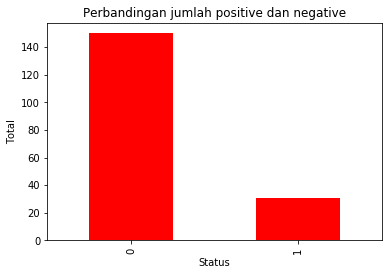

In [40]:
data['status'].value_counts().plot(kind='bar', color="r")
plt.title("Perbandingan jumlah positive dan negative")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

**statistic info**

In [42]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut12524,atribut12525,atribut12526,atribut12527,atribut12528,atribut12529,atribut12530,atribut12531,atribut12532,status
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,244.207735,46.787293,7.650276,-116.309392,21.091160,712.283425,31.027624,561.190055,1078.552486,882.119337,...,16.253039,48.505525,5.486740,136.919890,24.379558,59.979006,20.958011,44.710497,-38.600552,0.171271
std,93.719648,25.269030,27.072546,101.908620,25.519259,610.137460,95.584894,245.788947,1927.681693,344.191295,...,15.666115,33.061493,15.926834,54.241004,39.411149,42.838666,49.979540,37.167975,109.955702,0.377790
min,-11.000000,-17.800000,-69.500000,-291.100000,-121.200000,-14.400000,-84.300000,28.300000,126.900000,193.500000,...,-42.300000,-99.300000,-40.900000,-209.100000,-76.600000,-6.300000,-63.900000,-208.100000,-444.900000,0.000000
25%,190.000000,32.200000,-8.700000,-176.800000,5.500000,286.000000,-1.200000,399.900000,384.700000,624.900000,...,9.100000,35.200000,-3.200000,102.500000,1.900000,28.400000,6.600000,28.300000,-98.100000,0.000000
50%,243.200000,44.800000,5.600000,-132.700000,21.300000,538.100000,20.400000,514.000000,788.600000,815.100000,...,15.200000,52.600000,5.300000,140.500000,16.900000,49.100000,14.800000,46.100000,-61.600000,0.000000
75%,295.100000,56.400000,17.800000,-80.600000,37.300000,947.600000,40.300000,693.200000,1020.400000,1106.500000,...,22.200000,66.400000,15.100000,167.500000,37.100000,85.300000,23.500000,63.900000,3.200000,0.000000
max,549.000000,178.700000,185.100000,361.200000,76.300000,4882.000000,1004.600000,1493.500000,21804.400000,2017.800000,...,121.400000,193.700000,48.800000,283.200000,205.800000,250.000000,597.500000,143.100000,421.500000,1.000000


## Train Test Split

In [43]:
X = data.drop(['status'],axis=1)
y = data['status']

## Normalization

In [44]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_minmax = scaler.fit_transform(X_train_)
    X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
    X_test_minmax = scaler.transform(X_test_)
    X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
    return X_train_,X_test_

## Feature Selection

### Clustering (K-Means)

In [45]:
def k_means(X_train_):
    X_train_transpose = X_train_.transpose()
    model_kme = KMeans(n_clusters= 8)
    model_kme.fit(X_train_transpose)
    pred_kme = model_kme.predict(X_train_transpose)
    X_train_transpose_clustered = X_train_transpose.copy()
    X_train_transpose_clustered['cluster'] = pred_kme 
    return X_train_transpose_clustered

### Relief Method

In [46]:
def find_column(data_, data_selected, num_features_selected):
    for i in data_.columns:
        if data_[i].values.tolist() == data_selected.iloc[:,num_features_selected].values.tolist():
            column = i
            break
    return column

In [47]:
def relief_method(X_train_transpose_clusteredx, X_train_,y_train_, label_cluster):
    n_features_to_keep = 3
    n_neighbors = X_train_.shape[0]-1
    Train = pd.DataFrame()
    for i in clusters:
        X_train_transpose_clustered_ = X_train_transpose_clusteredx[X_train_transpose_clusteredx['cluster']==i]
        X_train_clustered_ = X_train_transpose_clustered_.drop(['cluster'],axis=1).transpose()
        fs = ReliefF(n_neighbors=n_neighbors, n_features_to_keep=n_features_to_keep)
        X_train_selected = fs.fit_transform(X_train_clustered_.values, y_train_)
        top_features = fs.top_features[0:n_features_to_keep]
        for j in top_features:
            if Train.shape == (0,0):
                Train = X_train_[[find_column(X_train_, X_train_clustered_, j)]]
            else:
                Train = Train.join(X_train_[[find_column(X_train_, X_train_clustered_, j)]])
    return Train

## Prepare data

In [48]:
def prepare_data(Train_,X_test_):
    X_train_ = Train_.copy()
    X_test_ = X_test_[X_train_.columns]
    return X_train_,X_test_

## Classification

In [49]:
model_de = DecisionTreeClassifier(criterion='entropy')
model_dg = DecisionTreeClassifier(criterion='gini')
model_rfe = RandomForestClassifier(criterion='entropy', n_estimators=60)
model_rfg = RandomForestClassifier(criterion='gini', n_estimators=60)
model_gb = GradientBoostingClassifier(n_estimators=60)

In [50]:
X_ = X.values
y_ = y.values

In [51]:
y_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

**K-fold Cross Validation**

In [52]:
kf = KFold(n_splits=8, random_state=20)
kf.get_n_splits(X_)

8

In [53]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_rfg.fit(X_train,y_train)
    pred = model_rfg.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
print("avg accuraccy = ",scoring.mean())
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Random Forest :  0.4782608695652174
Score in Random Forest :  0.5217391304347826
Score in Random Forest :  0.9565217391304348
Score in Random Forest :  0.9565217391304348
Score in Random Forest :  1.0
Score in Random Forest :  1.0
Score in Random Forest :  1.0
Score in Random Forest :  1.0
avg accuraccy =  0.8641304347826086
max accuraccy =  1.0
min accuraccy =  0.4782608695652174


**Leave One Out Cross Validation**

In [129]:
loo = LeaveOneOut()
loo.get_n_splits(X_)

print(loo)
scoring = []
i = 1
for train_index, test_index in loo.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_rfg.fit(X_train,y_train)
    pred = model_rfg.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print(i,". Score in RFE : ", hasil)
    scoring.append(hasil)
    i = i+1
scoring = np.array(scoring)
print(scoring.mean())

LeaveOneOut()
1 . Score in RFE :  1.0
2 . Score in RFE :  1.0
3 . Score in RFE :  1.0
4 . Score in RFE :  0.0
5 . Score in RFE :  1.0
6 . Score in RFE :  1.0
7 . Score in RFE :  1.0
8 . Score in RFE :  1.0
9 . Score in RFE :  1.0
10 . Score in RFE :  1.0
11 . Score in RFE :  1.0
12 . Score in RFE :  0.0
13 . Score in RFE :  1.0
14 . Score in RFE :  1.0
15 . Score in RFE :  1.0
16 . Score in RFE :  0.0
17 . Score in RFE :  1.0
18 . Score in RFE :  1.0
19 . Score in RFE :  1.0
20 . Score in RFE :  1.0
21 . Score in RFE :  1.0
22 . Score in RFE :  1.0
23 . Score in RFE :  0.0
24 . Score in RFE :  0.0
25 . Score in RFE :  1.0
26 . Score in RFE :  1.0
27 . Score in RFE :  1.0
28 . Score in RFE :  1.0
29 . Score in RFE :  1.0
30 . Score in RFE :  1.0
31 . Score in RFE :  1.0
32 . Score in RFE :  1.0
33 . Score in RFE :  1.0
34 . Score in RFE :  1.0
35 . Score in RFE :  1.0
36 . Score in RFE :  1.0
37 . Score in RFE :  1.0
38 . Score in RFE :  1.0
39 . Score in RFE :  1.0
40 . Score in RFE : 